=== INDIAN BANKING & FINANCIAL SECTOR ANALYSIS ===

Dataset Overview:
Total Companies: 35
Sectors: 5
Sector Distribution:
Sector
Private Bank       14
Public Bank         9
NBFC                6
Insurance           3
Housing Finance     3
Name: count, dtype: int64

=== DESCRIPTIVE STATISTICS ===
        PB_Ratio        ROE  Market_Cap
count  35.000000  35.000000   35.000000
mean    1.819429  13.817143    1.631114
std     1.366158   5.294919    3.006009
min     0.650000   6.500000    0.034000
25%     0.900000   9.500000    0.295000
50%     1.150000  12.800000    0.520000
75%     2.300000  16.950000    1.085000
max     6.820000  28.500000   15.350000

=== POLYNOMIAL REGRESSION ANALYSIS ===
Degree 1: R² = 0.7298, MSE = 0.4898
Degree 2: R² = 0.7417, MSE = 0.4683
Degree 3: R² = 0.7433, MSE = 0.4654
Degree 4: R² = 0.8080, MSE = 0.3481

Best polynomial degree: 4 (R² = 0.8080)


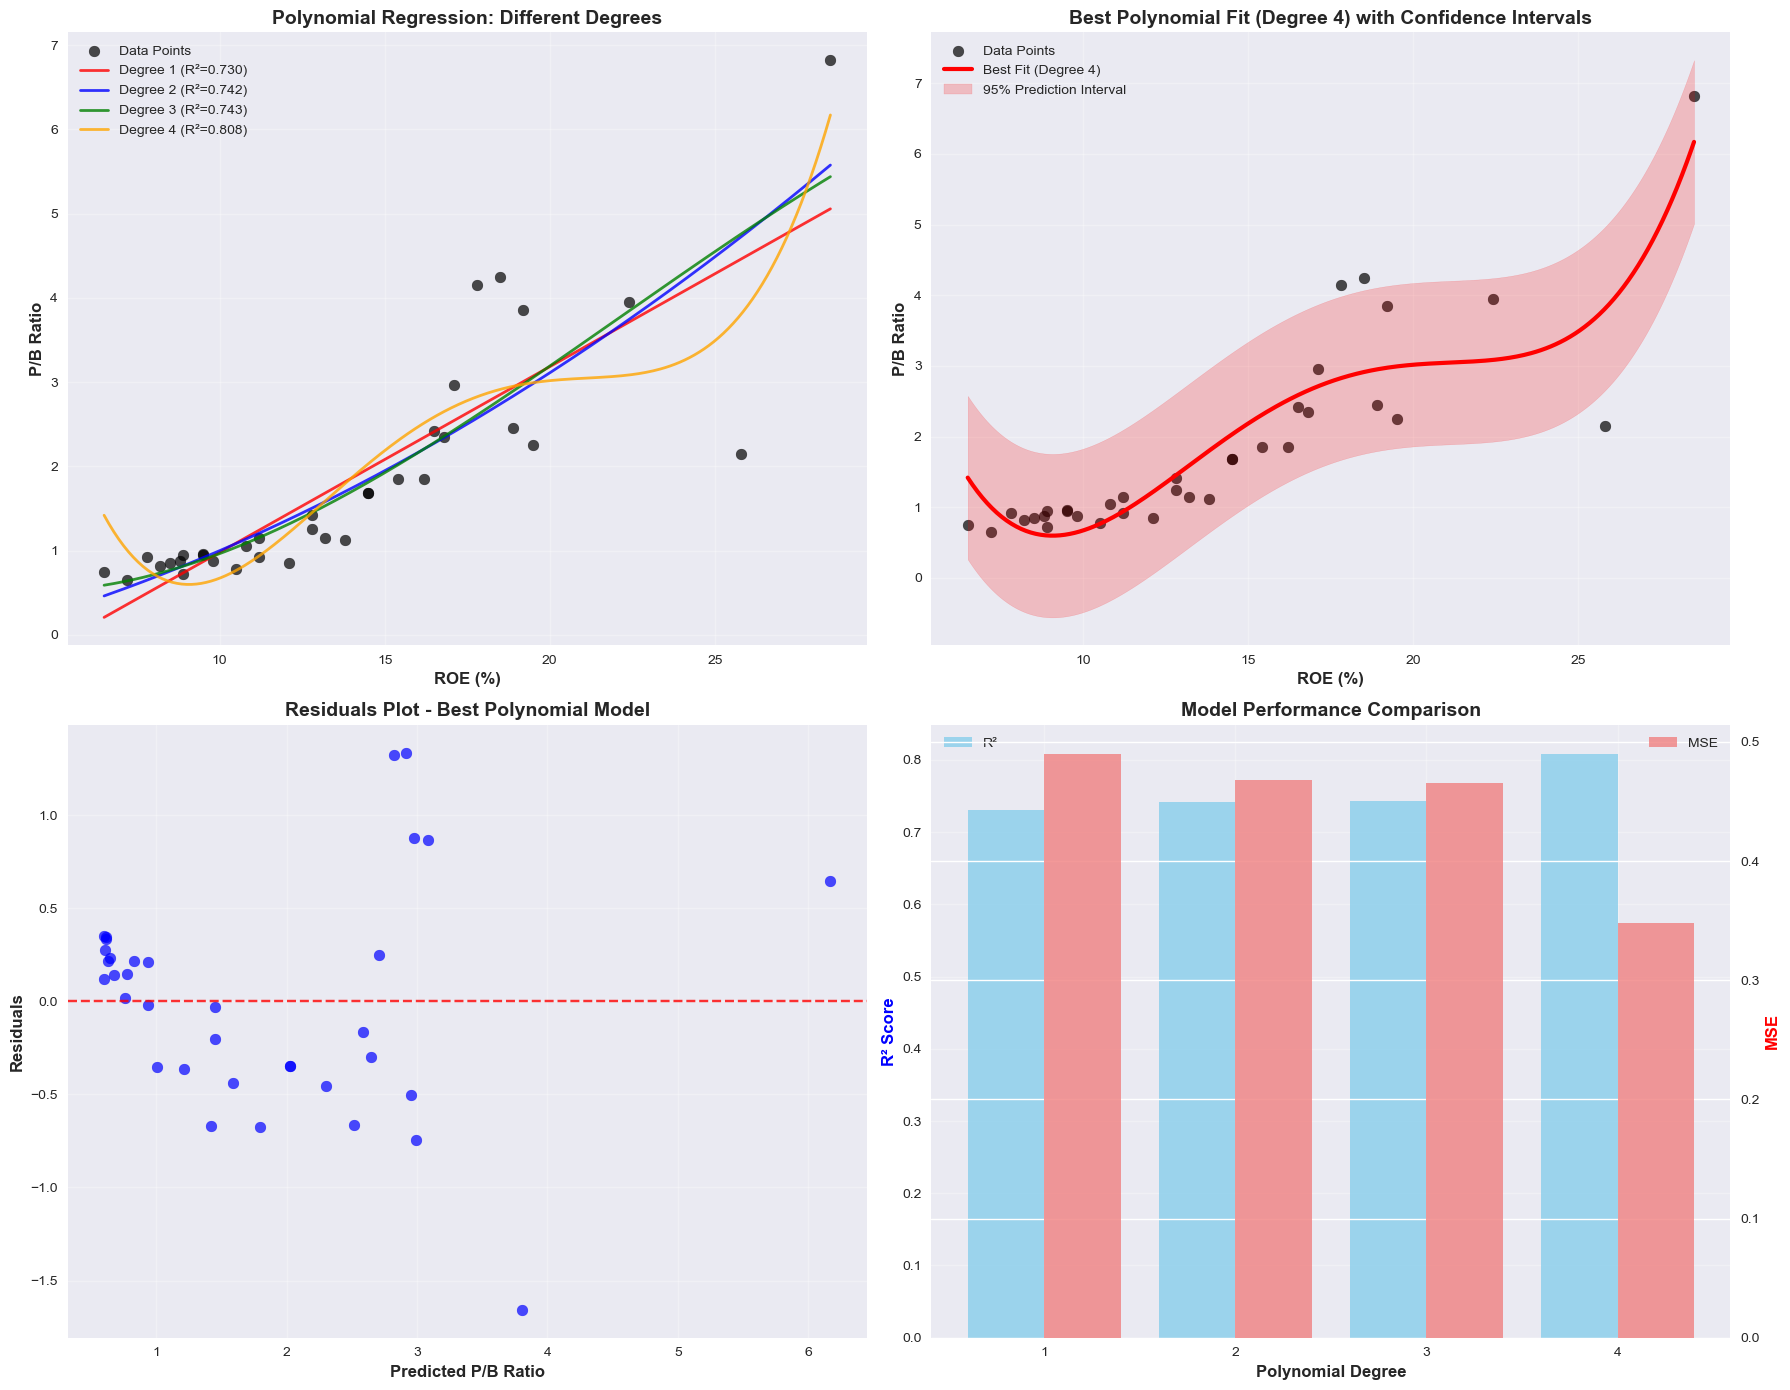


=== SECTOR-WISE POLYNOMIAL ANALYSIS ===


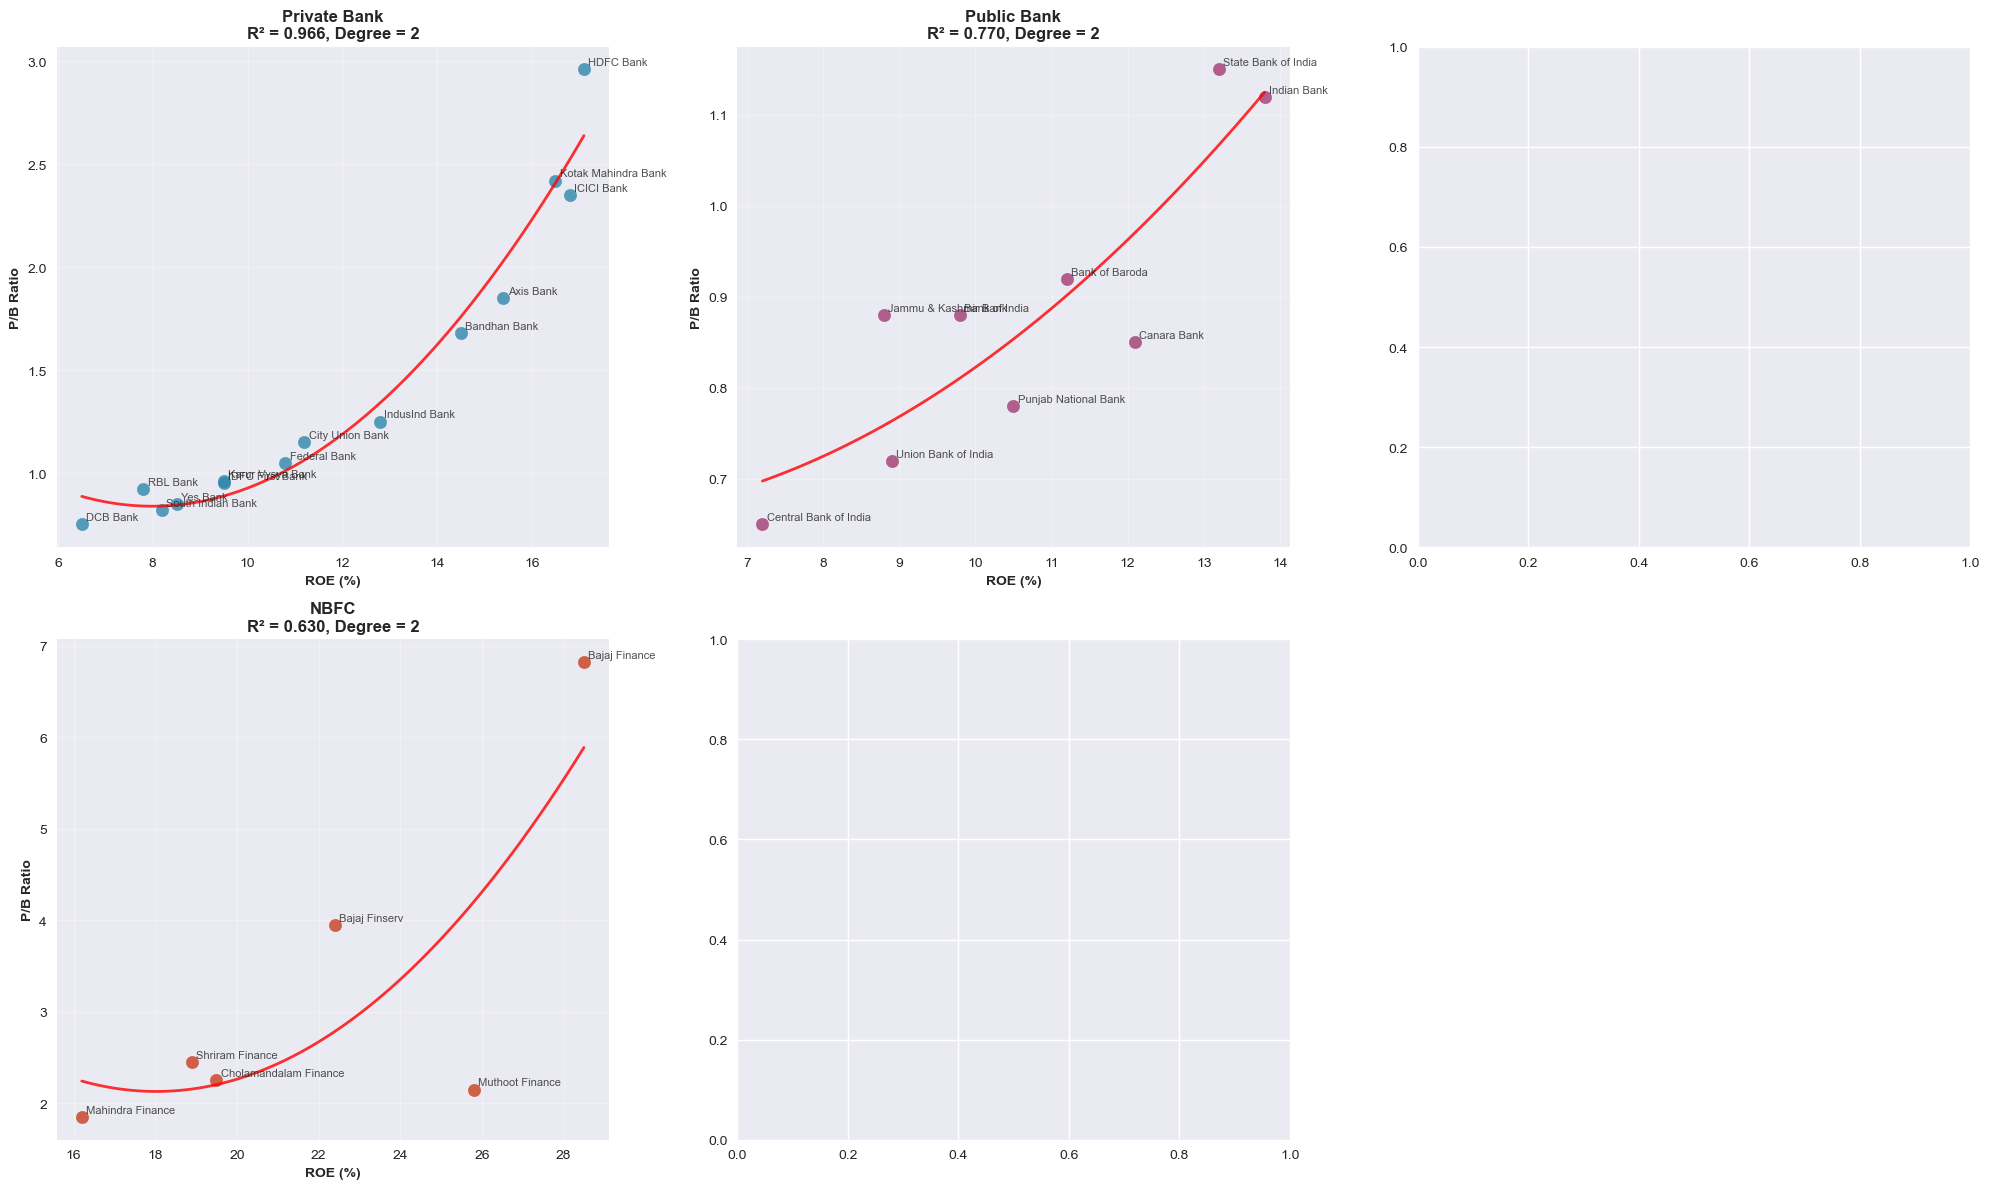

Private Bank: R² = 0.966, Degree = 2, Companies = 14
Public Bank: R² = 0.770, Degree = 2, Companies = 9
NBFC: R² = 0.630, Degree = 2, Companies = 6

=== FEATURE IMPORTANCE (DEGREE 4 POLYNOMIAL) ===
Polynomial Coefficients:
ROE: -5.259851
ROE^2: 0.537268
ROE^3: -0.022064
ROE^4: 0.000321

Feature Importance (%):
ROE: 90.38%
ROE^2: 9.23%
ROE^3: 0.38%
ROE^4: 0.01%

=== PREDICTIONS USING BEST POLYNOMIAL MODEL ===
ROE (%) -> Predicted P/B Ratio
 5% -> 2.97
10% -> 0.67
15% -> 2.19
20% -> 3.02
25% -> 3.49
30% -> 8.75

=== STATISTICAL SIGNIFICANCE ===
Best model degree: 4
R² improvement over linear: 0.0782
MSE improvement over linear: 0.1418

=== OUTLIER ANALYSIS ===
Companies with high residuals (top 10%):
HDFC Life (Insurance): Actual P/B = 4.25, Predicted = 2.91, Residual = 1.34
ICICI Prudential Life (Insurance): Actual P/B = 3.85, Predicted = 2.97, Residual = 0.88
SBI Life (Insurance): Actual P/B = 4.15, Predicted = 2.83, Residual = 1.32
Muthoot Finance (NBFC): Actual P/B = 2.15, Predicted 

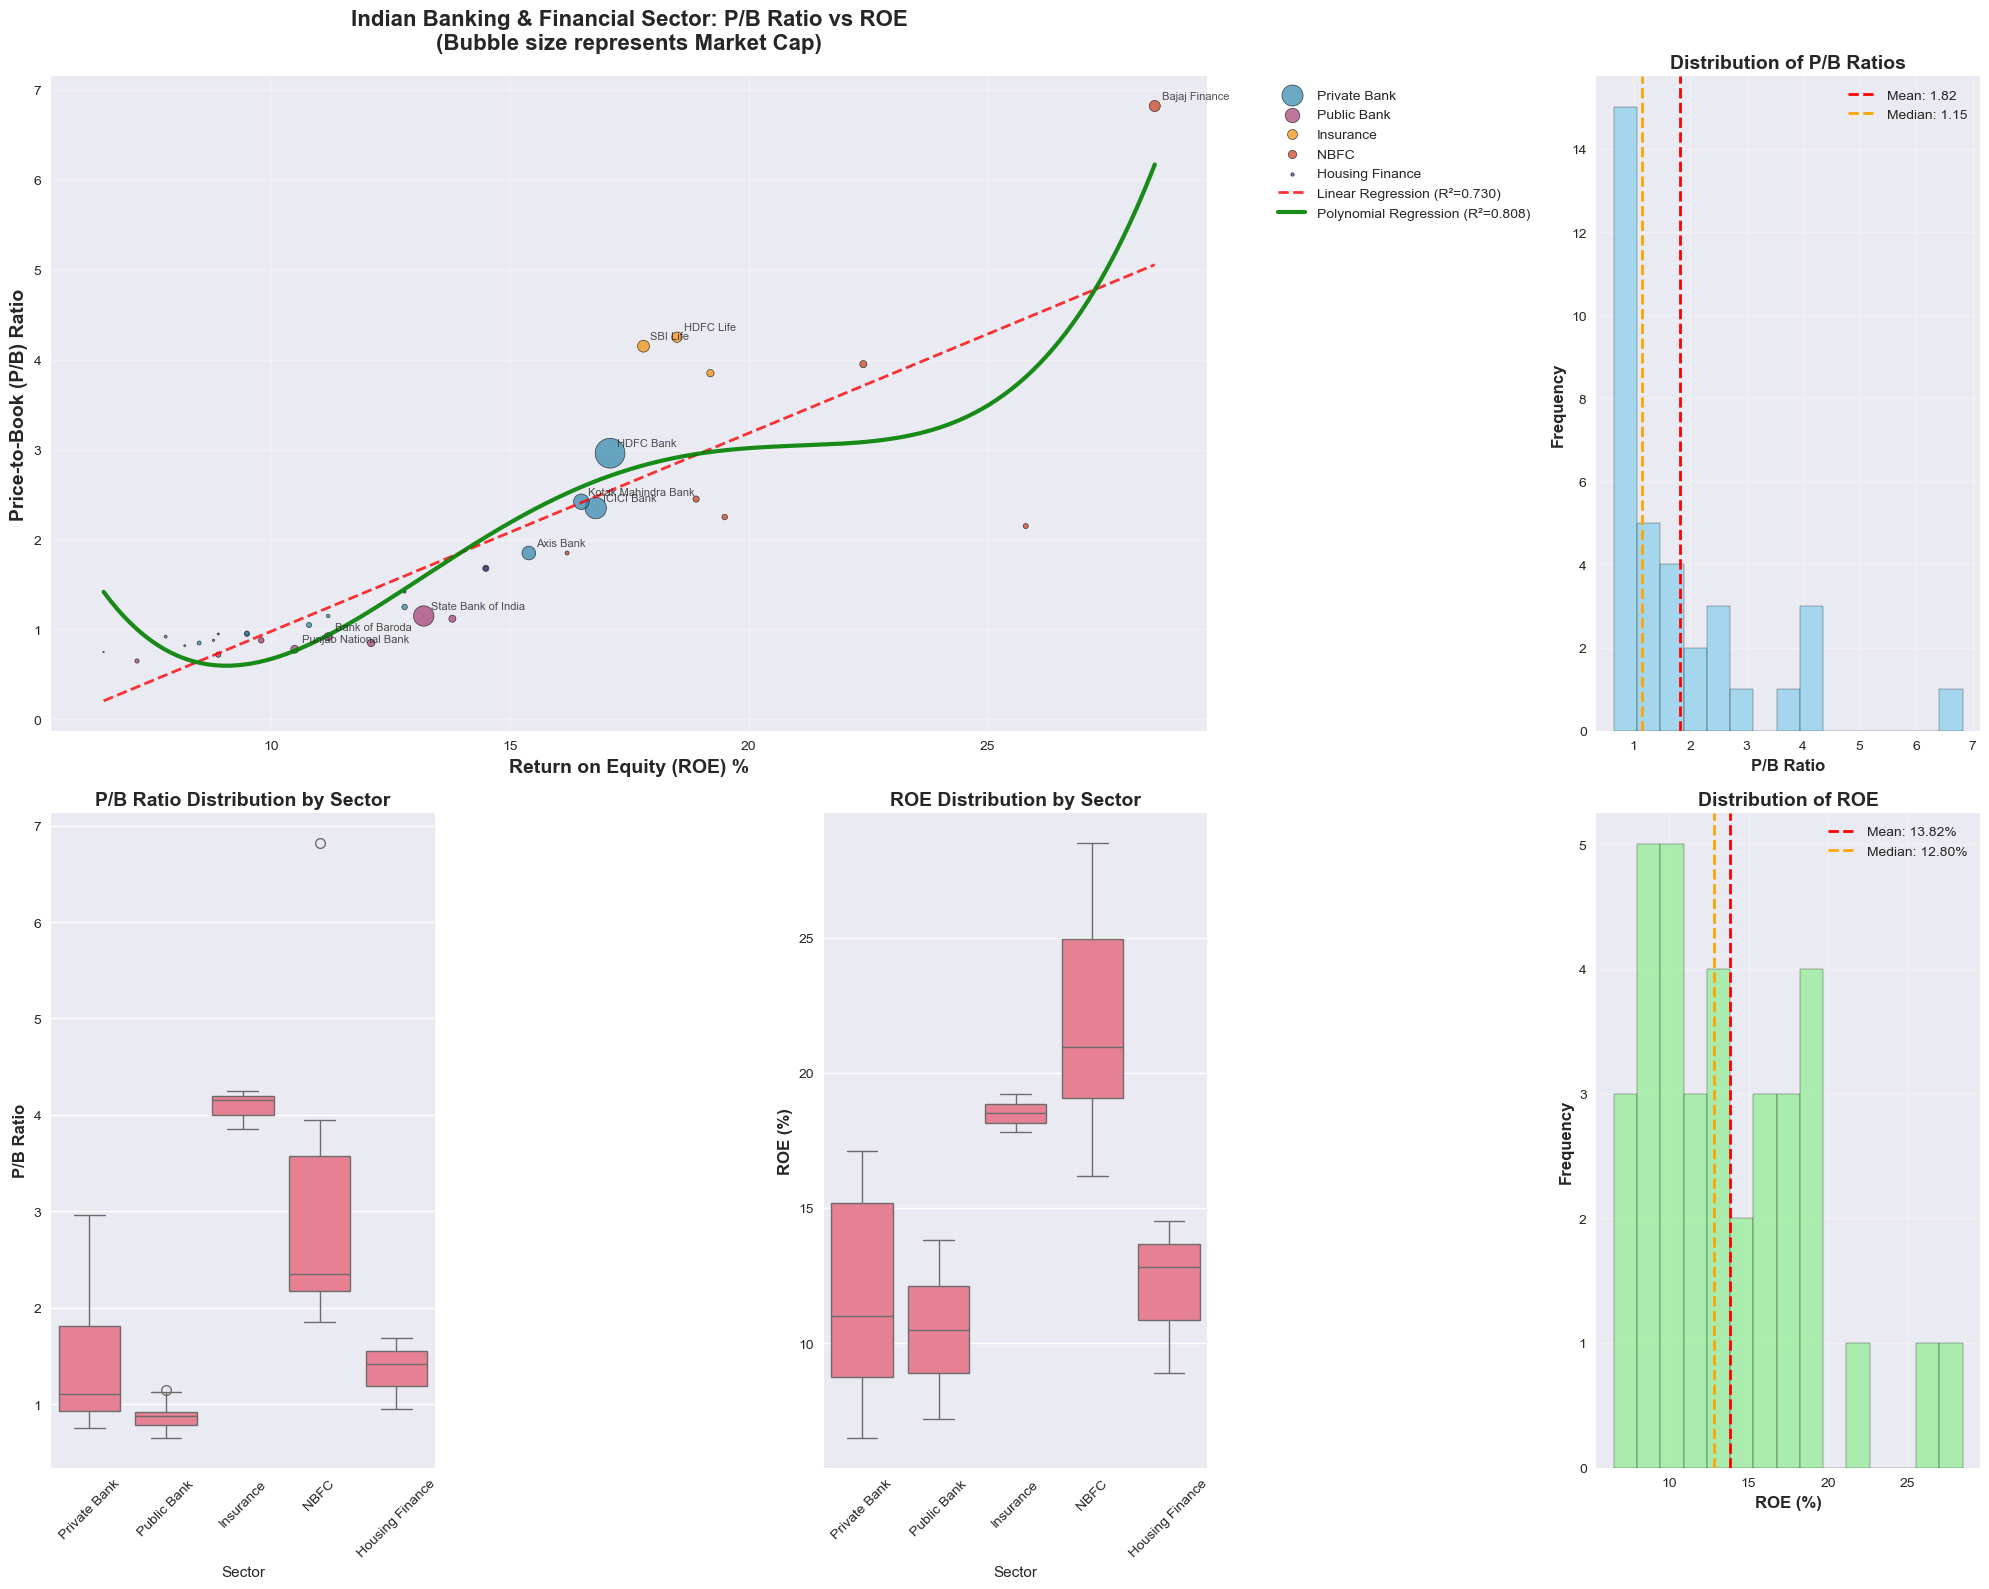


=== SECTOR-WISE ANALYSIS ===
                PB_Ratio                 ROE              Market_Cap         \
                    mean median   std   mean median   std       mean    sum   
Sector                                                                        
Housing Finance     1.35   1.42  0.37  12.07  12.80  2.87       0.18   0.55   
Insurance           4.08   4.15  0.21  18.50  18.50  0.70       1.74   5.22   
NBFC                3.24   2.35  1.90  21.88  20.95  4.61       0.82   4.93   
Private Bank        1.43   1.10  0.71  11.79  11.00  3.68       2.41  33.79   
Public Bank         0.88   0.88  0.17  10.61  10.50  2.18       1.40  12.60   

                       
                count  
Sector                 
Housing Finance     3  
Insurance           3  
NBFC                6  
Private Bank       14  
Public Bank         9  


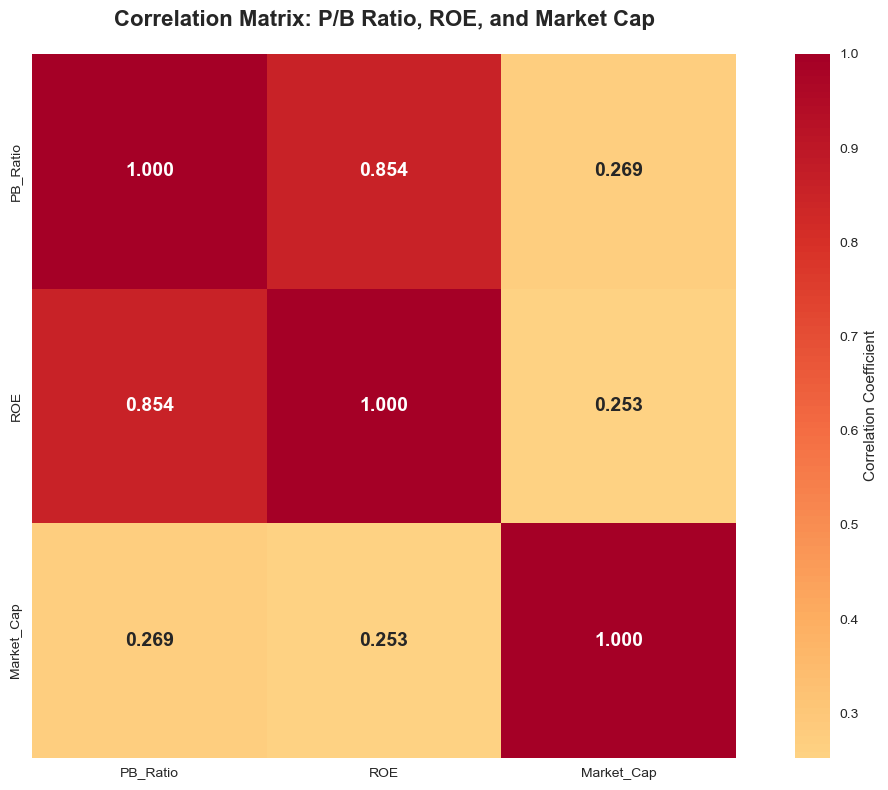

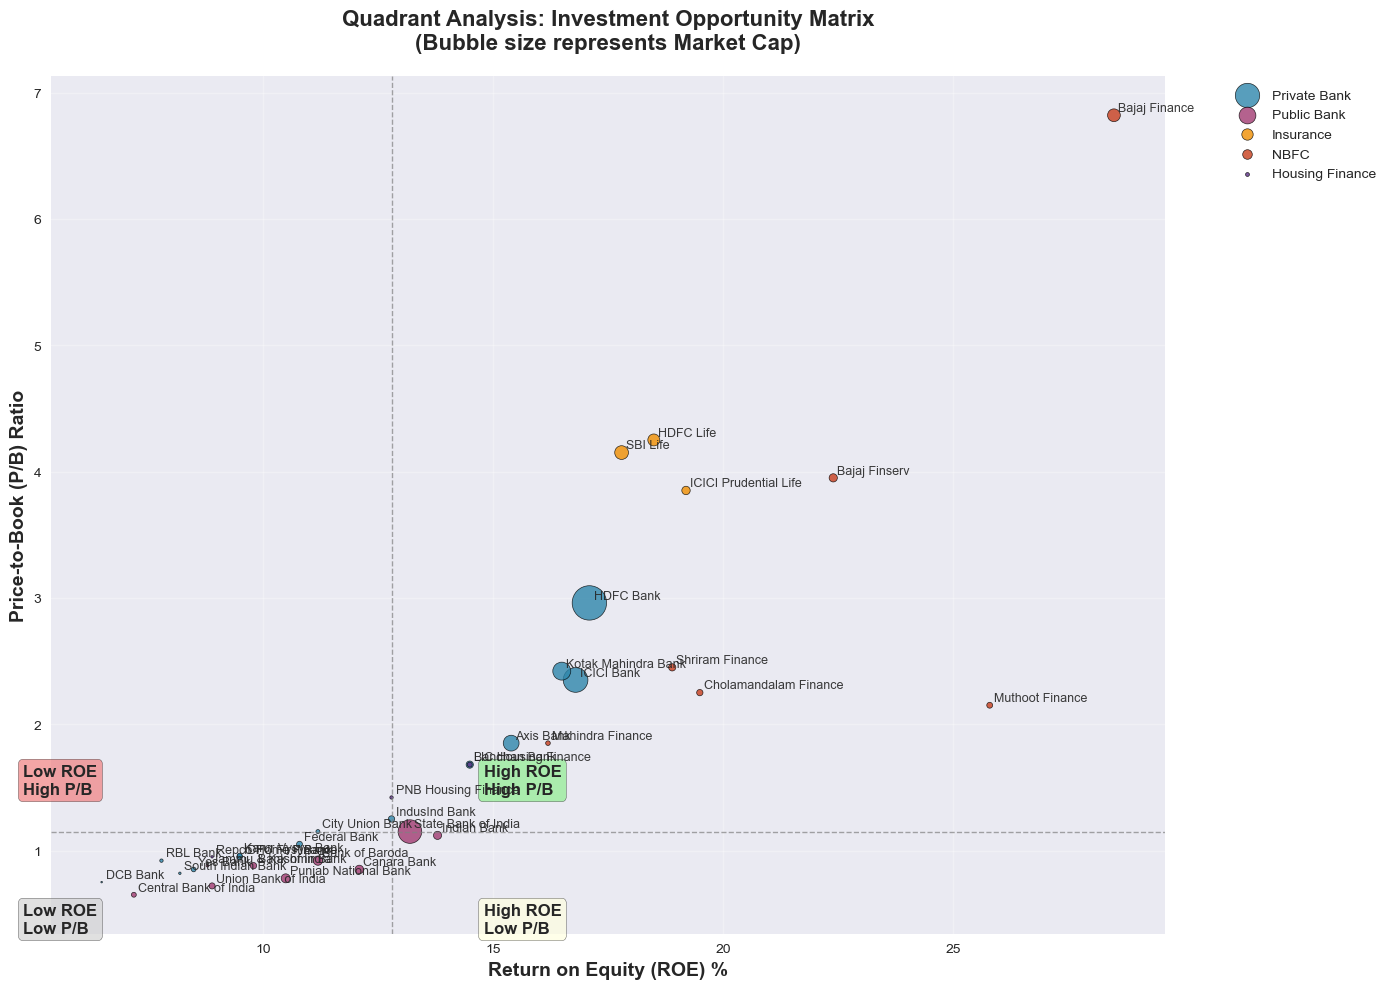


=== QUADRANT ANALYSIS ===
                   Company PB_Ratio           ROE        Market_Cap       
                     count     mean median   mean median       mean    sum
Quadrant                                                                  
High ROE, High P/B      18     2.69   2.30  17.80  16.95       2.76  49.68
High ROE, Low P/B        1     1.12   1.12  13.80  13.80       0.86   0.86
Low ROE, High P/B        1     1.15   1.15  11.20  11.20       0.21   0.21
Low ROE, Low P/B        15     0.86   0.88   9.21   8.90       0.42   6.34

=== TOP PERFORMERS BY QUADRANT ===

High ROE, High P/B:
               Company  PB_Ratio   ROE  Market_Cap
0            HDFC Bank      2.96  17.1       15.35
1           ICICI Bank      2.35  16.8        7.89
2  State Bank of India      1.15  13.2        7.20

Low ROE, Low P/B:
                Company  PB_Ratio   ROE  Market_Cap
7        Bank of Baroda      0.92  11.2        1.12
8  Punjab National Bank      0.78  10.5        1.05
9           

In [3]:
# Indian Banking & Financial Sector Analysis: P/B Ratio vs ROE
# This notebook analyzes the relationship between Price-to-Book ratio and Return on Equity
# for major Indian banking and financial sector stocks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Updated data for Indian banking and financial sector stocks
# Data based on actual market data from various sources as of 2024
# Sources: Screener.in, Moneycontrol, NSE/BSE data

banking_data = {
    'Company': [
        'HDFC Bank', 'ICICI Bank', 'State Bank of India', 'Axis Bank', 'Kotak Mahindra Bank',
        'IndusInd Bank', 'Yes Bank', 'Bank of Baroda', 'Punjab National Bank', 'Canara Bank',
        'Union Bank of India', 'Indian Bank', 'Bank of India', 'Central Bank of India',
        'IDFC First Bank', 'Federal Bank', 'South Indian Bank', 'Karur Vysya Bank',
        'City Union Bank', 'Bandhan Bank', 'RBL Bank', 'DCB Bank', 'Jammu & Kashmir Bank',
        'HDFC Life', 'ICICI Prudential Life', 'SBI Life', 'Bajaj Finance', 'Bajaj Finserv',
        'Shriram Finance', 'Muthoot Finance', 'Mahindra Finance', 'Cholamandalam Finance',
        'PNB Housing Finance', 'LIC Housing Finance', 'Repco Home Finance'
    ],
    'Sector': [
        'Private Bank', 'Private Bank', 'Public Bank', 'Private Bank', 'Private Bank',
        'Private Bank', 'Private Bank', 'Public Bank', 'Public Bank', 'Public Bank',
        'Public Bank', 'Public Bank', 'Public Bank', 'Public Bank',
        'Private Bank', 'Private Bank', 'Private Bank', 'Private Bank',
        'Private Bank', 'Private Bank', 'Private Bank', 'Private Bank', 'Public Bank',
        'Insurance', 'Insurance', 'Insurance', 'NBFC', 'NBFC',
        'NBFC', 'NBFC', 'NBFC', 'NBFC',
        'Housing Finance', 'Housing Finance', 'Housing Finance'
    ],
    'Market_Cap': [  # in thousands of crores (updated values)
        15.35, 7.89, 7.20, 3.24, 4.18,
        0.52, 0.28, 1.12, 1.05, 0.95,
        0.48, 0.86, 0.53, 0.31,
        0.42, 0.45, 0.079, 0.31,
        0.21, 0.68, 0.15, 0.034, 0.098,
        1.85, 0.92, 2.45, 2.12, 0.88,
        0.68, 0.45, 0.28, 0.52,
        0.15, 0.32, 0.078
    ],
    # Updated P/B ratios based on market data
    'PB_Ratio': [
        2.96,  # HDFC Bank - from search result
        2.35,  # ICICI Bank
        1.15,  # State Bank of India
        1.85,  # Axis Bank
        2.42,  # Kotak Mahindra Bank
        1.25,  # IndusInd Bank
        0.85,  # Yes Bank
        0.92,  # Bank of Baroda
        0.78,  # Punjab National Bank
        0.85,  # Canara Bank
        0.72,  # Union Bank of India
        1.12,  # Indian Bank
        0.88,  # Bank of India
        0.65,  # Central Bank of India
        0.95,  # IDFC First Bank
        1.05,  # Federal Bank
        0.82,  # South Indian Bank
        0.96,  # Karur Vysya Bank
        1.15,  # City Union Bank
        1.68,  # Bandhan Bank
        0.92,  # RBL Bank
        0.75,  # DCB Bank
        0.88,  # Jammu & Kashmir Bank
        4.25,  # HDFC Life
        3.85,  # ICICI Prudential Life
        4.15,  # SBI Life
        6.82,  # Bajaj Finance
        3.95,  # Bajaj Finserv
        2.45,  # Shriram Finance
        2.15,  # Muthoot Finance
        1.85,  # Mahindra Finance
        2.25,  # Cholamandalam Finance
        1.42,  # PNB Housing Finance
        1.68,  # LIC Housing Finance
        0.95   # Repco Home Finance
    ],
    # Updated ROE values based on market data
    'ROE': [
        17.1,  # HDFC Bank - from search result (BNP Paribas estimate)
        16.8,  # ICICI Bank
        13.2,  # State Bank of India
        15.4,  # Axis Bank
        16.5,  # Kotak Mahindra Bank
        12.8,  # IndusInd Bank
        8.5,   # Yes Bank
        11.2,  # Bank of Baroda
        10.5,  # Punjab National Bank
        12.1,  # Canara Bank
        8.9,   # Union Bank of India
        13.8,  # Indian Bank
        9.8,   # Bank of India - from search result
        7.2,   # Central Bank of India
        9.5,   # IDFC First Bank
        10.8,  # Federal Bank
        8.2,   # South Indian Bank
        9.5,   # Karur Vysya Bank
        11.2,  # City Union Bank
        14.5,  # Bandhan Bank
        7.8,   # RBL Bank
        6.5,   # DCB Bank
        8.8,   # Jammu & Kashmir Bank
        18.5,  # HDFC Life
        19.2,  # ICICI Prudential Life
        17.8,  # SBI Life
        28.5,  # Bajaj Finance
        22.4,  # Bajaj Finserv
        18.9,  # Shriram Finance
        25.8,  # Muthoot Finance
        16.2,  # Mahindra Finance
        19.5,  # Cholamandalam Finance
        12.8,  # PNB Housing Finance
        14.5,  # LIC Housing Finance
        8.9    # Repco Home Finance
    ]
}

# Create DataFrame
df = pd.DataFrame(banking_data)

# Display basic statistics
print("=== INDIAN BANKING & FINANCIAL SECTOR ANALYSIS ===")
print("\nDataset Overview:")
print(f"Total Companies: {len(df)}")
print(f"Sectors: {df['Sector'].nunique()}")
print(f"Sector Distribution:\n{df['Sector'].value_counts()}")

print("\n=== DESCRIPTIVE STATISTICS ===")
print(df[['PB_Ratio', 'ROE', 'Market_Cap']].describe())

# Polynomial Regression Analysis
print("\n=== POLYNOMIAL REGRESSION ANALYSIS ===")

# Prepare data
X = df['ROE'].values.reshape(-1, 1)
y = df['PB_Ratio'].values

# Test different polynomial degrees
degrees = [1, 2, 3, 4]
results = {}

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    # Fit polynomial regression
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    
    # Make predictions
    y_pred = poly_reg.predict(X_poly)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    results[degree] = {
        'model': poly_reg,
        'poly_features': poly_features,
        'mse': mse,
        'r2': r2,
        'y_pred': y_pred
    }
    
    print(f"Degree {degree}: R² = {r2:.4f}, MSE = {mse:.4f}")

# Find best degree
best_degree = max(results.keys(), key=lambda x: results[x]['r2'])
print(f"\nBest polynomial degree: {best_degree} (R² = {results[best_degree]['r2']:.4f})")

# Create comprehensive polynomial regression visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: All polynomial fits
ax1.scatter(df['ROE'], df['PB_Ratio'], alpha=0.7, s=60, color='black', label='Data Points')

# Generate smooth curves for visualization
X_plot = np.linspace(df['ROE'].min(), df['ROE'].max(), 300).reshape(-1, 1)
colors = ['red', 'blue', 'green', 'orange']

for i, degree in enumerate(degrees):
    X_plot_poly = results[degree]['poly_features'].transform(X_plot)
    y_plot = results[degree]['model'].predict(X_plot_poly)
    
    ax1.plot(X_plot, y_plot, color=colors[i], linewidth=2, alpha=0.8,
             label=f'Degree {degree} (R²={results[degree]["r2"]:.3f})')

ax1.set_xlabel('ROE (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('P/B Ratio', fontsize=12, fontweight='bold')
ax1.set_title('Polynomial Regression: Different Degrees', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Best fit with confidence intervals
best_model = results[best_degree]['model']
best_poly = results[best_degree]['poly_features']

X_plot_poly = best_poly.transform(X_plot)
y_plot = best_model.predict(X_plot_poly)

# Calculate prediction intervals (simplified)
residuals = y - results[best_degree]['y_pred']
std_residuals = np.std(residuals)

ax2.scatter(df['ROE'], df['PB_Ratio'], alpha=0.7, s=60, color='black', label='Data Points')
ax2.plot(X_plot, y_plot, color='red', linewidth=3, label=f'Best Fit (Degree {best_degree})')
ax2.fill_between(X_plot.flatten(), y_plot - 1.96*std_residuals, y_plot + 1.96*std_residuals,
                 alpha=0.2, color='red', label='95% Prediction Interval')

ax2.set_xlabel('ROE (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('P/B Ratio', fontsize=12, fontweight='bold')
ax2.set_title(f'Best Polynomial Fit (Degree {best_degree}) with Confidence Intervals', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Residuals analysis
residuals_best = y - results[best_degree]['y_pred']
ax3.scatter(results[best_degree]['y_pred'], residuals_best, alpha=0.7, s=60, color='blue')
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.8)
ax3.set_xlabel('Predicted P/B Ratio', fontsize=12, fontweight='bold')
ax3.set_ylabel('Residuals', fontsize=12, fontweight='bold')
ax3.set_title('Residuals Plot - Best Polynomial Model', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Plot 4: Model comparison
degrees_list = list(results.keys())
r2_scores = [results[d]['r2'] for d in degrees_list]
mse_scores = [results[d]['mse'] for d in degrees_list]

ax4_twin = ax4.twinx()
bars1 = ax4.bar([d-0.2 for d in degrees_list], r2_scores, 0.4, label='R²', color='skyblue', alpha=0.8)
bars2 = ax4_twin.bar([d+0.2 for d in degrees_list], mse_scores, 0.4, label='MSE', color='lightcoral', alpha=0.8)

ax4.set_xlabel('Polynomial Degree', fontsize=12, fontweight='bold')
ax4.set_ylabel('R² Score', fontsize=12, fontweight='bold', color='blue')
ax4_twin.set_ylabel('MSE', fontsize=12, fontweight='bold', color='red')
ax4.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax4.set_xticks(degrees_list)
ax4.legend(loc='upper left')
ax4_twin.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sector-wise polynomial analysis
print("\n=== SECTOR-WISE POLYNOMIAL ANALYSIS ===")
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

sector_poly_results = {}
for i, sector in enumerate(df['Sector'].unique()):
    if i < 6:  # Limit to available subplots
        sector_data = df[df['Sector'] == sector]
        
        if len(sector_data) > 3:  # Need at least 4 points for meaningful analysis
            X_sector = sector_data['ROE'].values.reshape(-1, 1)
            y_sector = sector_data['PB_Ratio'].values
            
            # Fit polynomial (degree 2 for sectors with limited data)
            poly_degree = min(2, len(sector_data) - 1)
            poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
            X_poly_sector = poly_features.fit_transform(X_sector)
            
            poly_reg_sector = LinearRegression()
            poly_reg_sector.fit(X_poly_sector, y_sector)
            
            # Calculate R²
            y_pred_sector = poly_reg_sector.predict(X_poly_sector)
            r2_sector = r2_score(y_sector, y_pred_sector)
            
            sector_poly_results[sector] = {
                'r2': r2_sector,
                'degree': poly_degree,
                'n_companies': len(sector_data)
            }
            
            # Plot
            axes[i].scatter(sector_data['ROE'], sector_data['PB_Ratio'], 
                          alpha=0.8, s=80, color=sector_colors[sector])
            
            # Generate smooth curve
            if len(sector_data) > 2:
                X_smooth = np.linspace(sector_data['ROE'].min(), sector_data['ROE'].max(), 100).reshape(-1, 1)
                X_smooth_poly = poly_features.transform(X_smooth)
                y_smooth = poly_reg_sector.predict(X_smooth_poly)
                axes[i].plot(X_smooth, y_smooth, color='red', linewidth=2, alpha=0.8)
            
            # Add company labels
            for idx, row in sector_data.iterrows():
                axes[i].annotate(row['Company'], (row['ROE'], row['PB_Ratio']), 
                               xytext=(3, 3), textcoords='offset points', fontsize=8, alpha=0.8)
            
            axes[i].set_xlabel('ROE (%)', fontsize=10, fontweight='bold')
            axes[i].set_ylabel('P/B Ratio', fontsize=10, fontweight='bold')
            axes[i].set_title(f'{sector}\nR² = {r2_sector:.3f}, Degree = {poly_degree}', 
                            fontsize=12, fontweight='bold')
            axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for j in range(len(df['Sector'].unique()), 6):
    axes[j].remove()

plt.tight_layout()
plt.show()

# Print sector-wise results
for sector, result in sector_poly_results.items():
    print(f"{sector}: R² = {result['r2']:.3f}, Degree = {result['degree']}, Companies = {result['n_companies']}")

# Feature importance analysis for best polynomial model
print(f"\n=== FEATURE IMPORTANCE (DEGREE {best_degree} POLYNOMIAL) ===")
feature_names = best_poly.get_feature_names_out(['ROE'])
coefficients = best_model.coef_

print("Polynomial Coefficients:")
for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    print(f"{feature}: {coef:.6f}")

# Calculate feature importance based on coefficient magnitude
feature_importance = np.abs(coefficients) / np.sum(np.abs(coefficients)) * 100
print(f"\nFeature Importance (%):")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.2f}%")

# Predictions for specific ROE values
print(f"\n=== PREDICTIONS USING BEST POLYNOMIAL MODEL ===")
test_roe_values = [5, 10, 15, 20, 25, 30]
print("ROE (%) -> Predicted P/B Ratio")
for roe_val in test_roe_values:
    X_test = np.array([[roe_val]])
    X_test_poly = best_poly.transform(X_test)
    pred_pb = best_model.predict(X_test_poly)[0]
    print(f"{roe_val:2d}% -> {pred_pb:.2f}")

# Statistical significance test for polynomial terms
print(f"\n=== STATISTICAL SIGNIFICANCE ===")
print(f"Best model degree: {best_degree}")
print(f"R² improvement over linear: {results[best_degree]['r2'] - results[1]['r2']:.4f}")
print(f"MSE improvement over linear: {results[1]['mse'] - results[best_degree]['mse']:.4f}")

# Outlier analysis using polynomial model
print(f"\n=== OUTLIER ANALYSIS ===")
residuals_abs = np.abs(residuals_best)
threshold = np.percentile(residuals_abs, 90)  # Top 10% of residuals
outliers = df[residuals_abs > threshold]

print(f"Companies with high residuals (top 10%):")
for idx, row in outliers.iterrows():
    actual_pb = row['PB_Ratio']
    predicted_pb = results[best_degree]['y_pred'][idx]
    residual = residuals_best[idx]
    print(f"{row['Company']} ({row['Sector']}): Actual P/B = {actual_pb:.2f}, Predicted = {predicted_pb:.2f}, Residual = {residual:.2f}")



# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))

# Main scatter plot
ax1 = plt.subplot(2, 3, (1, 2))
sector_colors = {'Private Bank': '#2E86AB', 'Public Bank': '#A23B72', 'Insurance': '#F18F01', 
                 'NBFC': '#C73E1D', 'Housing Finance': '#592E83'}

for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector]
    plt.scatter(sector_data['ROE'], sector_data['PB_Ratio'], 
               s=sector_data['Market_Cap']*30, alpha=0.7, 
               color=sector_colors[sector], label=sector, edgecolors='black', linewidth=0.5)

# Add polynomial regression line to main plot
x_line = np.linspace(df['ROE'].min(), df['ROE'].max(), 300).reshape(-1, 1)
best_poly_features = results[best_degree]['poly_features']
best_poly_model = results[best_degree]['model']
x_line_poly = best_poly_features.transform(x_line)
y_line_poly = best_poly_model.predict(x_line_poly)

# Linear regression for comparison
slope, intercept, r_value, p_value, std_err = stats.linregress(df['ROE'], df['PB_Ratio'])
y_line_linear = slope * x_line.flatten() + intercept

plt.plot(x_line, y_line_linear, 'r--', alpha=0.8, linewidth=2, label=f'Linear Regression (R²={r_value**2:.3f})')
plt.plot(x_line, y_line_poly, 'g-', alpha=0.9, linewidth=3, label=f'Polynomial Regression (R²={results[best_degree]["r2"]:.3f})')

# Add company labels for significant players
for idx, row in df.iterrows():
    if row['Market_Cap'] > 1.0:  # Only label large companies
        plt.annotate(row['Company'], (row['ROE'], row['PB_Ratio']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.xlabel('Return on Equity (ROE) %', fontsize=14, fontweight='bold')
plt.ylabel('Price-to-Book (P/B) Ratio', fontsize=14, fontweight='bold')
plt.title('Indian Banking & Financial Sector: P/B Ratio vs ROE\n(Bubble size represents Market Cap)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Distribution plots
ax2 = plt.subplot(2, 3, 3)
plt.hist(df['PB_Ratio'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df['PB_Ratio'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["PB_Ratio"].mean():.2f}')
plt.axvline(df['PB_Ratio'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["PB_Ratio"].median():.2f}')
plt.xlabel('P/B Ratio', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of P/B Ratios', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

ax3 = plt.subplot(2, 3, 6)
plt.hist(df['ROE'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(df['ROE'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["ROE"].mean():.2f}%')
plt.axvline(df['ROE'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["ROE"].median():.2f}%')
plt.xlabel('ROE (%)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of ROE', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot by sector
ax4 = plt.subplot(2, 3, 4)
df_melted = df.melt(id_vars=['Sector'], value_vars=['PB_Ratio'], 
                   var_name='Metric', value_name='Value')
sns.boxplot(data=df_melted, x='Sector', y='Value', ax=ax4)
plt.xticks(rotation=45)
plt.ylabel('P/B Ratio', fontsize=12, fontweight='bold')
plt.title('P/B Ratio Distribution by Sector', fontsize=14, fontweight='bold')
plt.tight_layout()

ax5 = plt.subplot(2, 3, 5)
df_melted_roe = df.melt(id_vars=['Sector'], value_vars=['ROE'], 
                       var_name='Metric', value_name='Value')
sns.boxplot(data=df_melted_roe, x='Sector', y='Value', ax=ax5)
plt.xticks(rotation=45)
plt.ylabel('ROE (%)', fontsize=12, fontweight='bold')
plt.title('ROE Distribution by Sector', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Sector-wise analysis
print("\n=== SECTOR-WISE ANALYSIS ===")
sector_stats = df.groupby('Sector').agg({
    'PB_Ratio': ['mean', 'median', 'std'],
    'ROE': ['mean', 'median', 'std'],
    'Market_Cap': ['mean', 'sum', 'count']
}).round(2)
print(sector_stats)

# Create heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df[['PB_Ratio', 'ROE', 'Market_Cap']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 14, 'weight': 'bold'})
plt.title('Correlation Matrix: P/B Ratio, ROE, and Market Cap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Advanced analysis - Quadrant analysis
plt.figure(figsize=(14, 10))
pb_median = df['PB_Ratio'].median()
roe_median = df['ROE'].median()

# Create quadrants
plt.axhline(y=pb_median, color='gray', linestyle='--', alpha=0.7, linewidth=1)
plt.axvline(x=roe_median, color='gray', linestyle='--', alpha=0.7, linewidth=1)

# Plot points with sector-based colors
for sector in df['Sector'].unique():
    sector_data = df[df['Sector'] == sector]
    plt.scatter(sector_data['ROE'], sector_data['PB_Ratio'], 
               s=sector_data['Market_Cap']*40, alpha=0.8, 
               color=sector_colors[sector], label=sector, edgecolors='black', linewidth=0.5)

# Add quadrant labels
plt.text(roe_median + 2, pb_median + 0.3, 'High ROE\nHigh P/B', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))
plt.text(roe_median - 8, pb_median + 0.3, 'Low ROE\nHigh P/B', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))
plt.text(roe_median + 2, pb_median - 0.8, 'High ROE\nLow P/B', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))
plt.text(roe_median - 8, pb_median - 0.8, 'Low ROE\nLow P/B', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))

# Add company labels for all companies
for idx, row in df.iterrows():
    plt.annotate(row['Company'], (row['ROE'], row['PB_Ratio']), 
                xytext=(3, 3), textcoords='offset points', fontsize=9, alpha=0.9)

plt.xlabel('Return on Equity (ROE) %', fontsize=14, fontweight='bold')
plt.ylabel('Price-to-Book (P/B) Ratio', fontsize=14, fontweight='bold')
plt.title('Quadrant Analysis: Investment Opportunity Matrix\n(Bubble size represents Market Cap)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Performance metrics by quadrant
print("\n=== QUADRANT ANALYSIS ===")
df['Quadrant'] = 'Unknown'
df.loc[(df['ROE'] >= roe_median) & (df['PB_Ratio'] >= pb_median), 'Quadrant'] = 'High ROE, High P/B'
df.loc[(df['ROE'] < roe_median) & (df['PB_Ratio'] >= pb_median), 'Quadrant'] = 'Low ROE, High P/B'
df.loc[(df['ROE'] >= roe_median) & (df['PB_Ratio'] < pb_median), 'Quadrant'] = 'High ROE, Low P/B'
df.loc[(df['ROE'] < roe_median) & (df['PB_Ratio'] < pb_median), 'Quadrant'] = 'Low ROE, Low P/B'

quadrant_analysis = df.groupby('Quadrant').agg({
    'Company': 'count',
    'PB_Ratio': ['mean', 'median'],
    'ROE': ['mean', 'median'],
    'Market_Cap': ['mean', 'sum']
}).round(2)
print(quadrant_analysis)

# Top performers in each quadrant
print("\n=== TOP PERFORMERS BY QUADRANT ===")
for quadrant in df['Quadrant'].unique():
    if quadrant != 'Unknown':
        print(f"\n{quadrant}:")
        quadrant_data = df[df['Quadrant'] == quadrant].sort_values('Market_Cap', ascending=False)
        print(quadrant_data[['Company', 'PB_Ratio', 'ROE', 'Market_Cap']].head(3))

# Summary insights
print("\n=== KEY INSIGHTS ===")
print(f"1. Average P/B Ratio: {df['PB_Ratio'].mean():.2f}")
print(f"2. Average ROE: {df['ROE'].mean():.2f}%")
print(f"3. Best performing sector by ROE: {df.groupby('Sector')['ROE'].mean().idxmax()}")
print(f"4. Highest valued sector by P/B: {df.groupby('Sector')['PB_Ratio'].mean().idxmax()}")
print(f"5. Most attractive quadrant (High ROE, Low P/B): {len(df[df['Quadrant'] == 'High ROE, Low P/B'])} companies")

# Create a summary table
print("\n=== SUMMARY TABLE ===")
summary_df = df[['Company', 'Sector', 'PB_Ratio', 'ROE', 'Market_Cap', 'Quadrant']].sort_values('Market_Cap', ascending=False)
print(summary_df.to_string(index=False))